In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import tensorflow as tf
import random

warnings.filterwarnings('ignore')

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam

In [3]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])
    
def plot_compare_histories(history_list, name_list, plot_accuracy=True):
    dflist = []
    min_epoch = len(history_list[0].epoch)
    losses = []
    for history in history_list:
        h = {key: val for key, val in history.history.items() if not key.startswith('val_')}
        dflist.append(pd.DataFrame(h, index=history.epoch))
        min_epoch = min(min_epoch, len(history.epoch))
        losses.append(h['loss'][-1])

    historydf = pd.concat(dflist, axis=1)

    metrics = dflist[0].columns
    idx = pd.MultiIndex.from_product([name_list, metrics], names=['model', 'metric'])
    historydf.columns = idx
    
    plt.figure(figsize=(6, 8))

    ax = plt.subplot(211)
    historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title("Training Loss: " + ' vs '.join([str(round(x, 3)) for x in losses]))
    
    if plot_accuracy:
        ax = plt.subplot(212)
        historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
        plt.title("Accuracy")
        plt.xlabel("Epochs")
    
    plt.xlim(0, min_epoch-1)
    plt.tight_layout()

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


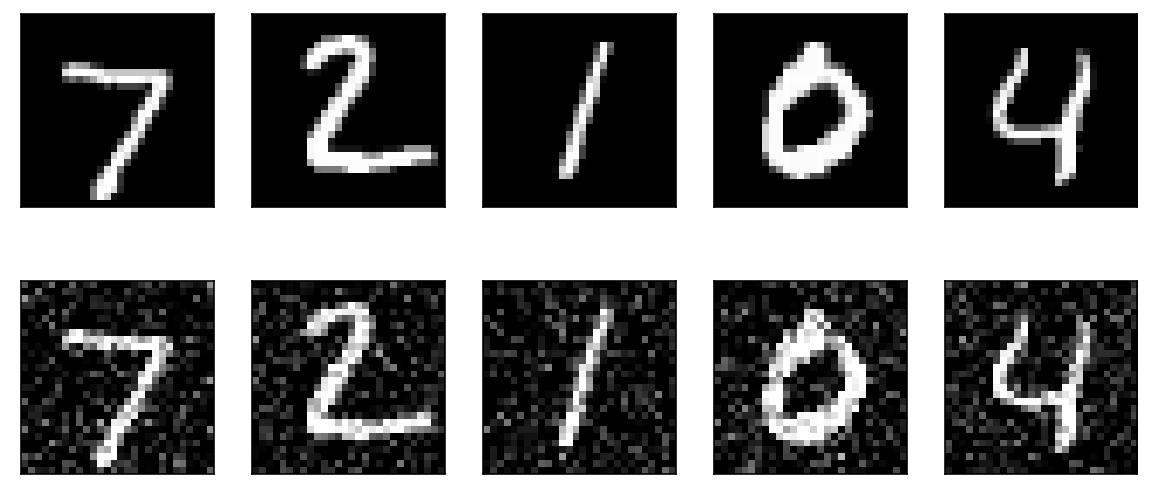

In [5]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')

In [6]:
input_size = 784
hidden_size = 128
code_size = 64

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1410
Epoch 2/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1020
Epoch 3/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0951
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0918
Epoch 5/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0896
Epoch 6/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0881
Epoch 7/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0870
Epoch 8/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0862
Epoch 9/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0856
Epoch 10/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.085

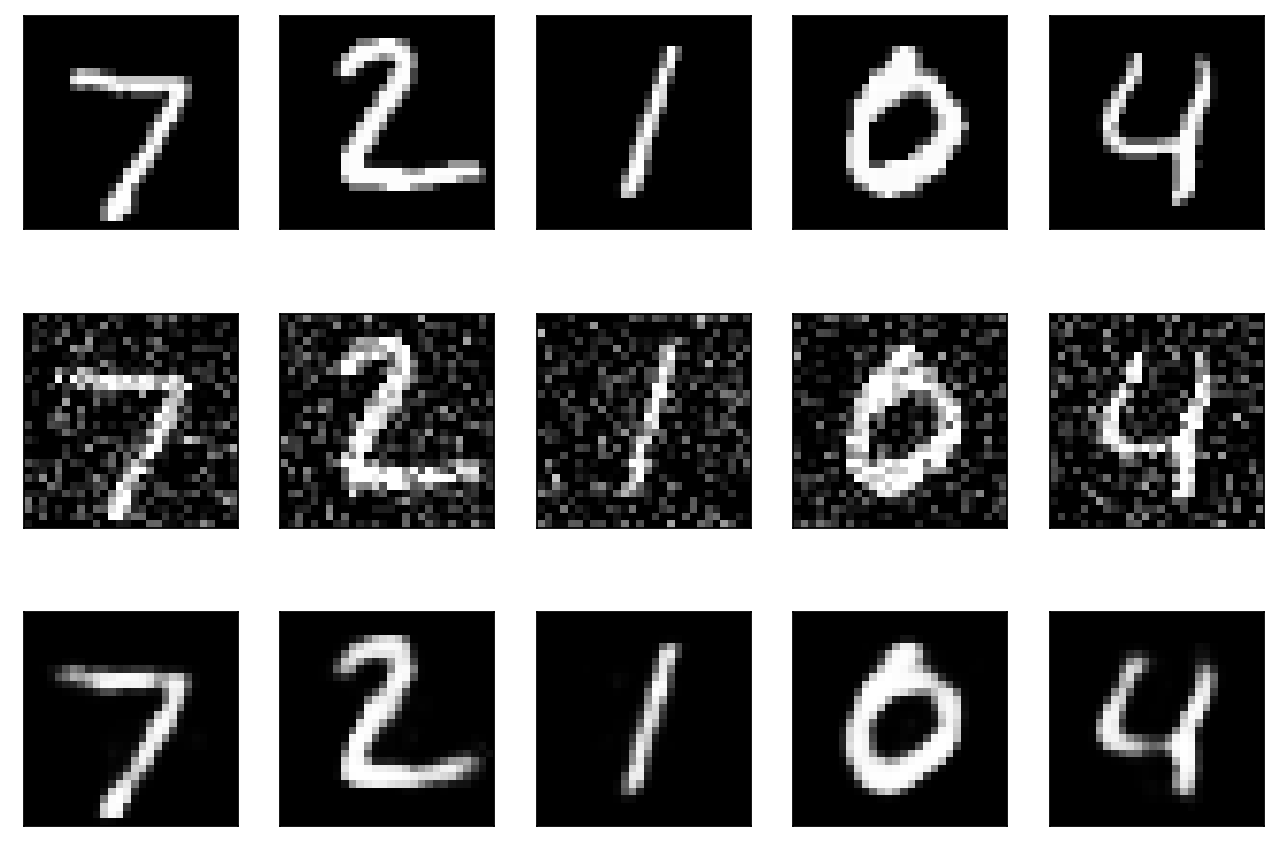

In [20]:
n = 5
plt.figure(figsize=(10, 7))
########## add Gaussian Noise ##############
############################################
x_test_noisy = x_test + 0.25 * np.random.normal(size=x_test.shape)
###########################################
########## Add SP noise #################


x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)
images = autoencoder.predict(x_test_noisy)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')


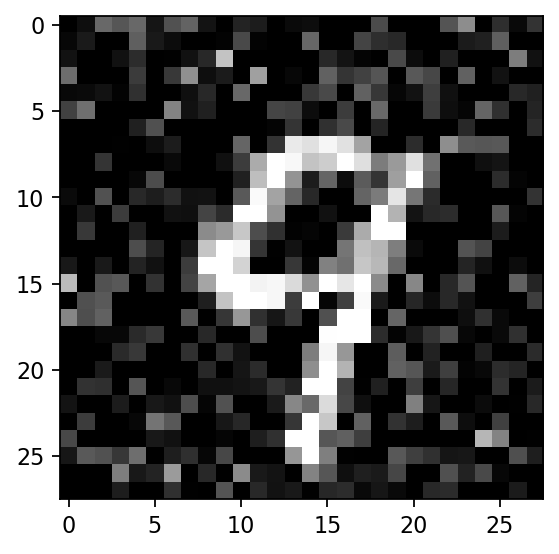

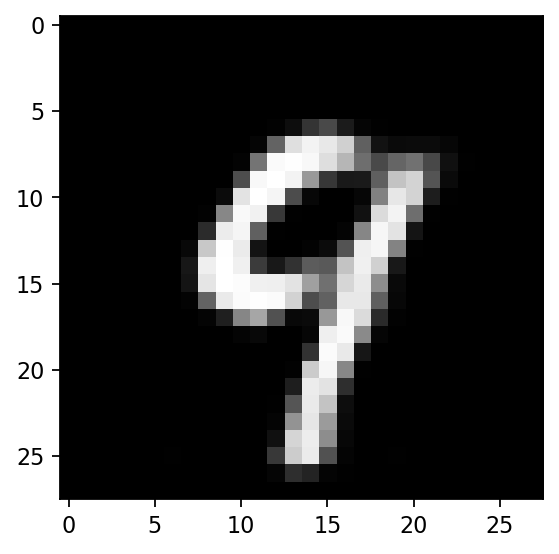

In [21]:
plt.rcParams['figure.dpi'] = 80 #分辨率
plt.imshow(x_test_noisy[12].reshape((28,28)),cmap = 'gray')

plt.figure()
plt.imshow(images[12].reshape(28,28),cmap = 'gray')

In [22]:
from tensorflow.image import psnr

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    psnr_1 = psnr(x_test.reshape((-1,28,28,1)),images.reshape((-1,28,28,1)),max_val = 1.0)
    psnr_2 = psnr(x_test_noisy.reshape((-1,28,28,1)),x_test.reshape((-1,28,28,1)),max_val = 1.0)
    output_1,output_2 = sess.run([psnr_1,psnr_2])
    print('noisy psnr = ',output_2[12])
    print('processed psnr = ',output_1[12])

noisy psnr =  15.065432
processed psnr =  21.689638


In [69]:
print('processed psnr 9 = ',output_1[12])
print('processed psnr 3 = ',output_1[30])

processed psnr 9 =  17.21051
processed psnr 3 =  17.10674


In [23]:
#print('networkoutput = ',networkoutput)
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 1
            else:
                output[i][j] = image[i][j]
    return output

In [50]:
img = x_test[12].reshape((28,28,1))
sp_noisy = sp_noise(img,0.025)
sp_noisy_vec = sp_noisy.reshape((1,784,))

images = autoencoder.predict(sp_noisy_vec)

from tensorflow.image import psnr

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    psnr_1 = psnr(img,images.reshape((28,28,1)),max_val = 1.0)
    output_1= sess.run(psnr_1)
    print('processed psnr = ',output_1)

processed psnr =  22.782427


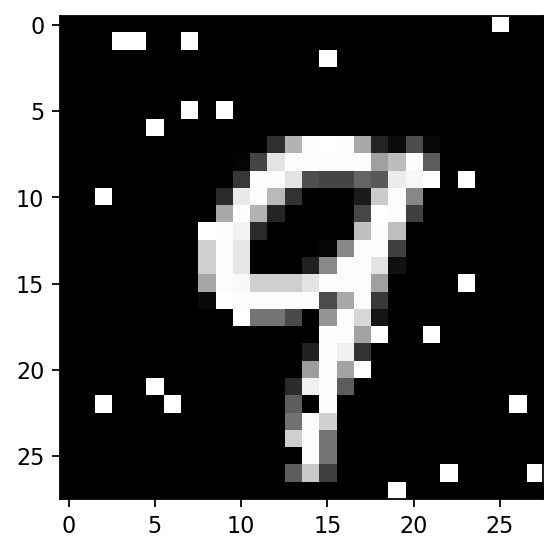

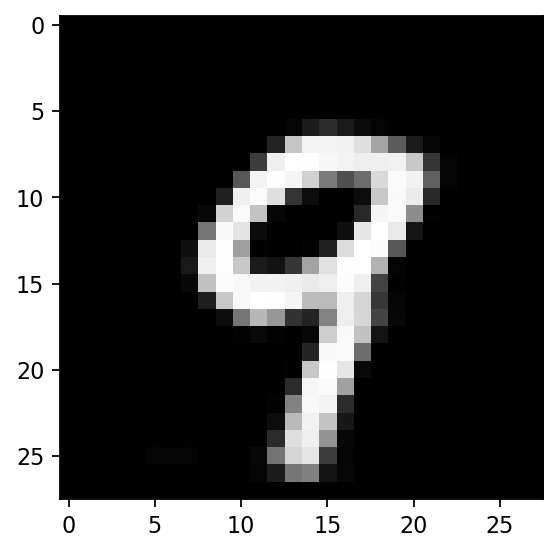

In [52]:
plt.rcParams['figure.dpi'] = 80 #分辨率
plt.imshow(sp_noisy.reshape((28,28)),cmap = 'gray')

plt.figure()
plt.imshow(images.reshape(28,28),cmap = 'gray')